Conversion of NCL colormaps for use in Matplotlib.

Example urls: 
https://www.ncl.ucar.edu/Document/Graphics/ColorTables/Files/amwg256.rgb

In [44]:
import numpy as np
import matplotlib as mpl
from urllib.parse import urlparse
from urllib.request import urlretrieve
from pathlib import Path
import re

ncl_names = ['amwg256',
'BkBlAqGrYeOrReViWh200',
'BlAqGrYeOrRe',
'BlAqGrYeOrReVi200',
'BlGrYeOrReVi200',
'example',
'GMT_seis',
'GMT_wysiwygcont',
'matlab_hsv',
'matlab_jet',
'MPL_gist_ncar',
'MPL_gist_rainbow',
'MPL_hsv',
'MPL_jet',
'MPL_rainbow',
'MPL_Spectral',
'NCV_bright',
'NCV_jaisnd',
'NCV_jet',
'NCV_rainbow2',
'ncview_default',
'nice_gfdl',
'rainbow',
'rainbow+gray',
'rainbow+white',
'rainbow+white+gray',
'tbr_240-300',
'tbr_stdev_0-30',
'tbr_var_0-500',
'tbrAvg1',
'tbrStd1',
'tbrVar1',
'temp1',
'testcmap',
'ViBlGrWhYeOrRe',
'wh-bl-gr-ye-re',
'WhBlGrYeRe',
'WhiteBlueGreenYellowRed',
'WhViBlGrYeOrRe',
'WhViBlGrYeOrReWh',
# start "small rainbow"
'amwg',
'BlAqGrWh2YeOrReVi22',
'cosam',
'cosam12',
'cyclic',
'GHRSST_anomaly',
'GMT_wysiwyg',
'grads_rainbow',
'gui_default',
'prcp_1',
'prcp_2',
'prcp_3',
'radar',
'radar_1',
'seaice_1',
'seaice_2',
'so4_21',
'so4_23',
'wgne15',
# Earth/Ocean
'cmocean_deep',
'cmp_haxby',
'GMT_drywet',
'GMT_globe',
'GMT_haxby',
'GMT_nighttime',
'GMT_ocean',
'GMT_relief',
'GMT_relief_oceanonly',
'GMT_topo',
'MPL_BrBG',
'MPL_gist_earth',
'MPL_ocean',
'MPL_terrain',
'NCV_gebco',
'OceanLakeLandSnow',
'topo_15lev',
#Oceanography 
'cmocean_algae',
'cmocean_amp',
'cmocean_balance',
'cmocean_curl',
'cmocean_deep',
'cmocean_delta',
'cmocean_dense',
'cmocean_gray',
'cmocean_haline',
'cmocean_ice',
'cmocean_matter',
'cmocean_oxy',
'cmocean_phase',
'cmocean_solar',
'cmocean_speed',
'cmocean_tempo',
'cmocean_thermal',
'cmocean_turbid',
# color blindness color tables
'BlueDarkOrange18',
'BlueDarkRed18',
'BlueGreen14',
'BrownBlue12',
'Cat12',
'cb_9step',
'cb_rainbow',
'cb_rainbow_inv',
'CBR_coldhot',
'CBR_drywet',
'CBR_wet',
# 'cividis', <-- already mpl name
'GreenMagenta16',
'posneg_1',
'posneg_2',
'srip_reanalysis',
'StepSeq25',
# MeteoSwiss 
'hotcold_18lev',
'hotcolr_19lev',
'mch_default',
'perc2_9lev',
'percent_11lev',
'precip2_15lev',
'precip2_17lev',
'precip3_16lev',
'precip4_11lev',
'precip4_diff_19lev',
'precip_11lev',
'precip_diff_12lev',
'precip_diff_1lev',
'rh_19lev',
'spread_15lev',
'sunshine_9lev',
'sunshine_diff_12lev',
't2m_29lev',
'temp_19lev',
'temp_diff_18lev',
'temp_diff_1lev',
'topo_15lev',
'wind_17lev',
#Blue/Red color tables --> definitely repeats ... set() this after
'BlRe',
'BlueDarkRed18',
'BlueRed',
'BlueRedGray',
'BlWhRe',
'CBR_coldhot',
'cmocean_balance',
'cmp_b2r',
'GMT_polar',
'GMT_split',
'hotcold_18lev',
'hotcolr_19lev',
'hotres',
'MPL_bwr',
'MPL_coolwarm',
'MPL_RdBu',
'MPL_seismic',
'NCV_blu_red',
'NCV_blue_red',
'posneg_1',
'posneg_2',
'temp_19lev',
'temp_diff_18lev',
'temp_diff_1lev',
'WhBlReWh',
# Blue/Green color tables
'BlueGreen14',
'CBR_wet',
'cmocean_deep',
'cmocean_haline',
'GMT_gebco',
'GMT_ocean',
'GMT_relief_oceanonly',
'GSFC_landsat_udf_density',
'MPL_BuGn',
'MPL_GnBu',
'MPL_ocean',
'MPL_PuBuGn',
'MPL_viridis',
'MPL_winter',
'MPL_YlGnBu',
# Red/Orange color tables
'cmocean_matter',
'GMT_hot',
'hotres',
'matlab_hot',
'MPL_afmhot',
'MPL_autumn',
'MPL_gist_heat',
'MPL_hot',
'MPL_Oranges',
'MPL_OrRd',
'MPL_Reds',
'MPL_YlOrBr',
'MPL_YlOrRd',
'sunshine_9lev',
'WhiteYellowOrangeRed',
#Red/Green color tables
'cmocean_curl',
'drought_severity',
'GMT_red2green',
'helix1',
'MPL_RdYlGn',
'SVG_fs2006',
# Green/Yellow color tables
'cmocean_speed',
'GreenYellow',
'MPL_summer',
'MPL_YlGn',
# Red/Purple color tables
'cmocean_matter',
'MPL_gnuplot',
'MPL_PuRd',
'MPL_RdPu',
'sunshine_diff_12lev',
#Blue/Purple color tables
'cmocean_dense',
'GMT_cool',
'MPL_cool',
# Green/Purple color tables
'GreenMagenta16',
'MPL_PRGn',
# Brown/Copper color tables
'BlueDarkOrange18',
'BrownBlue12',
'CBR_drywet',
'cmocean_turbid',
'GMT_copper',
'MPL_BrBG',
'MPL_copper',
'MPL_pink',
'MPL_s3pcpn',
'OceanLakeLandSnow',
'precip_diff_12lev',
'precip_diff_1lev',
'SVG_bhw3_22',
'SVG_es_landscape_79',
# Blue/Yellow/Red color tables
'amwg_blueyellowred',
'BlueWhiteOrangeRed',
'BlueYellowRed',
'cmp_b2r',
'cmp_flux',
'GMT_jet',
'GMT_no_green',
'GMT_panoply',
'MPL_RdYlBu',
'ncl_default',
'nrl_sirkes',
'nrl_sirkes_nowhite',
'UKM_hadcrut',
# Blue color tables
'cmocean_ice',
'MPL_Blues',
'MPL_PuBu',
'WhiteBlue',
# Purple color tables
'MPL_BuPu',
'MPL_Purples',
# Green color tables
'cmocean_algae',
'cmocean_tempo',
'MPL_BuGn',
'MPL_Greens',
'WhiteGreen',
# Gray color tables
'cmocean_gray',
'GMT_gray',
'GMT_relief_oceanonly',
'GrayWhiteGray',
'gscyclic',
'gsdtol',
'gsltod',
'mch_default',
'MPL_gist_gray',
'MPL_gist_yarg',
'MPL_Greys',
'MPL_RdGy',
'wxpEnIR',
# Banded color tables
'3gauss',
'3saw',
'cb_9step',
'detail',
'extrema',
'matlab_lines',
'MPL_StepSeq',
'NCV_banded',
'NCV_manga',
'NCV_roullet',
'psgcap',
'StepSeq25',
'SVG_Gallet13',
'SVG_Lindaa06',
'SVG_Lindaa07',
'uniform',
# Faded color tables
'CBR_set3',
'GMT_topo',
'MPL_Accent',
'MPL_Dark2',
'MPL_Paired',
'MPL_Pastel1',
'MPL_Pastel2',
'MPL_Set1',
'MPL_Set2',
'MPL_Set3',
'SVG_feb_sunrise',
'SVG_foggy_sunrise',
# Circular color tables
'circular_0',
'circular_1',
'circular_2',
'cmocean_phase',
'GrayWhiteGray',
'matlab_lines',
# Miscellaneous color tables
'default',
'helix',
'hlu_default',
'lithology',
'thelix',
# Vegetation color tables
'MPL_BrBG',
'NEO_div_vegetation_a',
'NEO_div_vegetation_b',
'NEO_div_vegetation_c',
'NEO_modis_ndvi',
'NOC_ndvi',
'vegetation_ClarkU',
'vegetation_modis',
'MPL_PiYG',
'MPL_PuOr',
'GMT_paired',
'grads_default',
'MPL_bone',
'MPL_brg',
'MPL_cubehelix',
'MPL_flag',
'MPL_gist_stern',
'MPL_gnuplot2',
'MPL_prism',
'MPL_s3pcpn_l',
'MPL_spring',
'MPL_sstanom']
ncl_names = list(set(ncl_names)) # gets rid of duplicates

def guess_ncl_url(cmap):
    return f"https://www.ncl.ucar.edu/Document/Graphics/ColorTables/Files/{cmap}.rgb"


def download_ncl_colormap(url, dest):
    urlretrieve(url, dest)


def read_ncl_colormap(fil):
    # determine if fil is a URL:
    # if so, we have to download it
    if isinstance(fil, str):
        pars = urlparse(fil)
        if pars.scheme in ['http', 'https', 'ftp']:
            filename = Path.cwd() / fil.split("/")[-1]
            if filename.is_file():
                print(f"File already downloaded as {filename}")
            else:
                print(f"File will be downloaded and saved as {filename}")
                download_ncl_colormap(fil, str(filename))
        else:
            is_url = False
            filename = Path(fil)
    elif isinstance(fil, Path):
        filename = fil
    else:
        raise ValueError(f"ERROR: what to do with type {type(fil)}")
        
    # NCL's colormaps are not regularized enough to just use read_csv. 
    # We have to determine how many lines to skip because it varies.
    # NCL has some files that have "comments" at the end
    # which will look like additional columnns
    # We basically are forced to just read line-by-line

    # ASSUME ALL NCL COLORMAPS ARE N rows BY 3 COLUMNS,
    # AND THE VALUES ARE INTEGERS 0-255.
    with open(filename) as f:
        table_exists = False
        for count, line in enumerate(f):
            line_str = line.strip() # remove leading/trailing whitespace
            if (len(line_str) == 0) or (not line_str[0].isdigit()):
                continue # empty line or non-data line 
                # NOTE: also skips if the first value is negative (hlu_default) 
            else:
                if re.search(r'[^\s0-9-\.]', line_str): # any non number characters ASSUMED AT END
                    # take the string up to the non-matching character
                    line_vals = line_str[:re.search(r'[^\s0-9-\.]', line_str).start()-1].strip().split()
                else:
                    line_vals = line_str.split()
                try: 
                    row = [float(r) for r in line_vals]
                except:
                    print("ERROR")
                    print(line_vals)
                if table_exists:
                    table = np.vstack([table, row])
                else:
                    table = np.array(row)
                    table_exists=True
    return table

def ncl_to_mpl(nclmap, name):
    if nclmap.max() > 1:
        try:
            vals = nclmap / 255
        except:
            print(f"ERROR: could not divide by 255. {type(nclmap) = }")
            print(nclmap)
            return None
    else:
        print(f"{name} seems to be 0-1")
        vals = nclmap
    assert vals.shape[1] == 3, 'vals.shape should be (N,3)'
    ncolors = vals.shape[0]
    if ncolors > 100:
        my_cmap = mpl.colors.LinearSegmentedColormap.from_list(name, vals)
        my_cmap_r = my_cmap.reversed()
    else:
        my_cmap = mpl.colors.ListedColormap(vals, name)
        my_cmap_r = my_cmap.reversed()
    # my_cmap, my_cmap_r from reversing a colormap
    # ALLOW MPL TO KNOW ABOUT THE COLORMAP:
    # mpl.colormaps.register(cmap=my_cmap)
    # mpl.colormaps.register(cmap=my_cmap_r)
    return my_cmap, my_cmap_r


In [53]:

ncl_colors = {}

colormap_file_loc = Path.home() / "Code" / "AMP_toolbox" / "ncl_colormaps_in_mpl"

for i in ncl_names:
    url = guess_ncl_url(i)
    locfil = colormap_file_loc / f"{i}.rgb"
    if locfil.is_file():
        data = read_ncl_colormap(locfil)
    else:
        data = read_ncl_colormap(url)
    cm, cmr = ncl_to_mpl(data, i)
    ncl_colors[cm.name] = cm
    ncl_colors[cmr.name] = cmr
    

MPL_YlOrRd seems to be 0-1
MPL_sstanom seems to be 0-1
MPL_ocean seems to be 0-1
MPL_viridis seems to be 0-1
temp1 seems to be 0-1
hlu_default seems to be 0-1
MPL_YlOrBr seems to be 0-1
GMT_paired seems to be 0-1
MPL_pink seems to be 0-1
MPL_RdGy seems to be 0-1
GMT_ocean seems to be 0-1
MPL_Accent seems to be 0-1
MPL_gnuplot2 seems to be 0-1
MPL_PRGn seems to be 0-1
MPL_StepSeq seems to be 0-1
MPL_PiYG seems to be 0-1
MPL_gnuplot seems to be 0-1
GMT_topo seems to be 0-1
MPL_RdYlBu seems to be 0-1
psgcap seems to be 0-1
MPL_cool seems to be 0-1
MPL_winter seems to be 0-1
MPL_prism seems to be 0-1
MPL_Set1 seems to be 0-1
GMT_copper seems to be 0-1
GMT_globe seems to be 0-1
MPL_RdBu seems to be 0-1
GMT_split seems to be 0-1
MPL_PuBuGn seems to be 0-1
MPL_bone seems to be 0-1
MPL_flag seems to be 0-1
GMT_wysiwyg seems to be 0-1
GMT_gray seems to be 0-1
GMT_relief_oceanonly seems to be 0-1
MPL_Set2 seems to be 0-1
GMT_seis seems to be 0-1
MPL_seismic seems to be 0-1
GMT_no_green seems to 

In [54]:
import matplotlib.pyplot as plt


gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=ncl_colors[name])
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

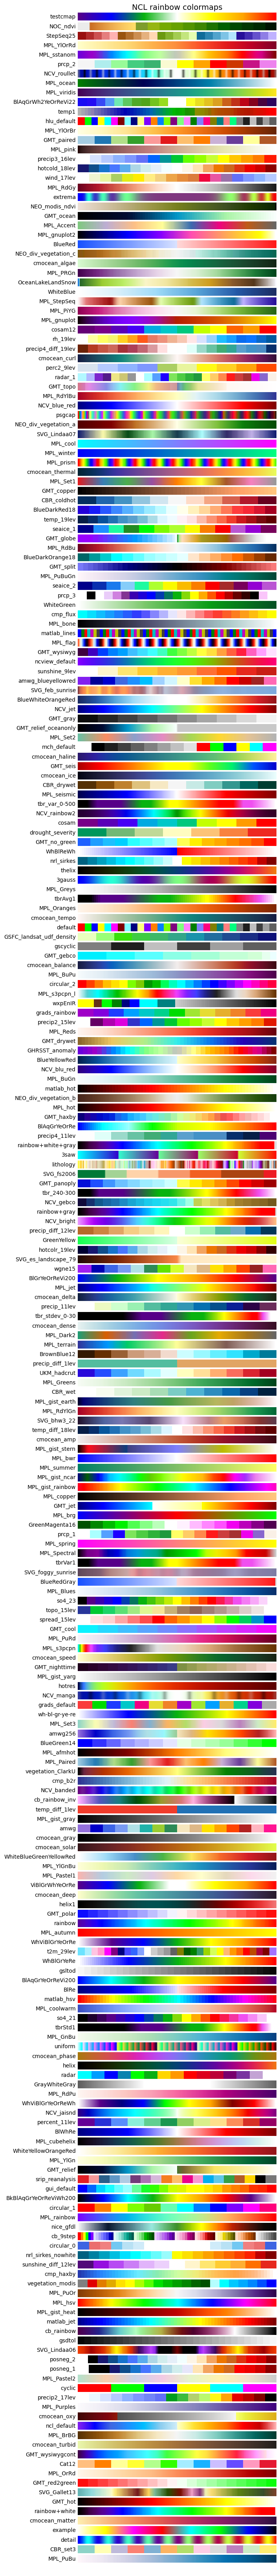

In [55]:
plot_color_gradients('NCL rainbow',
                     ncl_names)

In [48]:
print(colormap_file_loc)
f = colormap_file_loc / f"MPL_PuBu.rgb"
print(f)
m = read_ncl_colormap(f)
mo, mo_r = ncl_to_mpl(m, 'MPL_PuBu')

/Users/brianpm/Code/AMP_toolbox/ncl_colormaps_in_mpl
/Users/brianpm/Code/AMP_toolbox/ncl_colormaps_in_mpl/MPL_PuBu.rgb
MPL_PuBu seems to be 0-1


In [51]:
mo.name    

'MPL_PuBu'

In [39]:
s[re.search(r'[^\s0-9-\.]', s).start():]

'/* white/black */'